<a href="https://colab.research.google.com/github/malakbayramovaa/Machine-Learning/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machine (SVM)** güclü və çoxistiqamətli bir machine learning modelidir, linear və ya nonlinear classification, regression, hətta novelty detection həyata keçirə bilir. SVM-lər xüsusilə kiçik və orta ölçülü nonlinear dataset-lərdə (yəni yüzlərlə və ya minlərlə instance) yaxşı işləyir, xüsusilə classification task-ları üçün.

Lakin, çox böyük dataset-lərdə scale-lənməsi yaxşı deyil, bunu sonra görəcəksiniz.

# Linear SVM Classification

SVM-lərin əsas ideyası ən yaxşı şəkildə vizuallarla izah olunur. Figure 5-1 iris dataset-inin bir hissəsini göstərir, bu dataset Chapter 4-ün sonunda təqdim olunmuşdu. İki class aydın şəkildə bir düz xəttlə asanlıqla ayrılır (yəni linearly separable).

Sol tərəfdəki plot üç mümkün linear classifier-in decision boundaries-ini göstərir. Dashed line ilə göstərilmiş model o qədər pisdir ki, hətta class-ları düzgün ayıra bilmir. Digər iki model isə bu training set-də mükəmməl işləyir, lakin onların decision boundaries instance-lərə çox yaxındır, buna görə bu modellərin yeni instance-lərdə yaxşı performans göstərəcəyi şübhəlidir.

Buna qarşı, sağ tərəfdəki plot-da solid line SVM classifier-in decision boundary-ini göstərir; bu xətt yalnız iki class-ı ayırmır, həm də ən yaxın training instance-lərdən mümkün qədər uzaqda qalır.

SVM classifier-i belə təsəvvür edə bilərsiniz: classes arasında mümkün qədər geniş bir küçə (parallel dashed lines ilə göstərilmiş) çəkir. Bu yanaşma large margin classification adlanır.

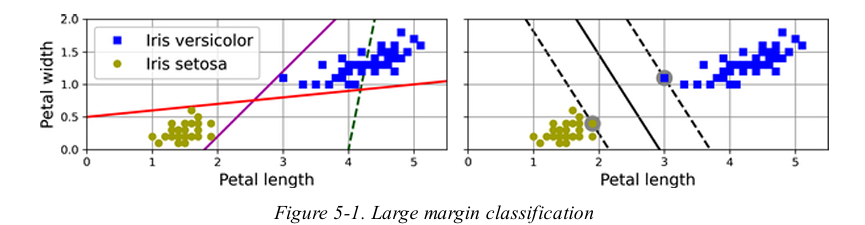

# Soft Margin Classification


Əgər biz sərt şəkildə tələb etsək ki, bütün instances küçədən kənarda olsun və düzgün tərəfdə yerləşsin, buna hard margin classification deyilir.

Hard margin classification-in iki əsas problemi var. Birincisi, bu yalnız data linearly separable olduqda işləyir. İkincisi, bu yanaşma outliers-lara həssasdır.

Figure 5-3 iris dataset-ini yalnız bir əlavə outlier ilə göstərir:

* Solda, hard margin tapmaq mümkün deyil;

* Sağda isə decision boundary outlier olmadan Figure 5-1-də gördüyümüzdən çox fərqlənir və model çox güman ki, yaxşı generalize etməyəcək.

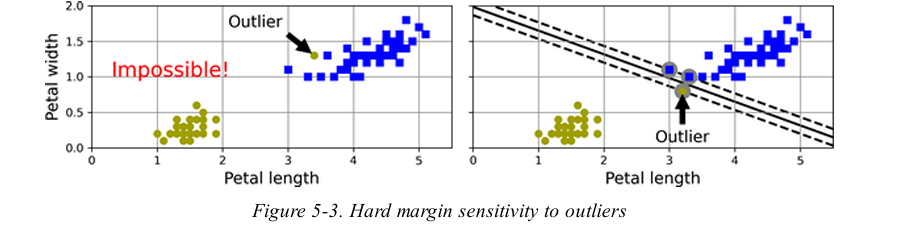

Bu problemlərin qarşısını almaq üçün daha çevik (flexible) model istifadə etməliyik. Məqsəd küçəni mümkün qədər geniş saxlamaq ilə margin violations-ları (instances-ların küçənin ortasında və ya hətta səhv tərəfdə olması) məhdudlaşdırmaq arasında yaxşı balans tapmaqdır. Buna soft margin classification deyilir.

Scikit-Learn istifadə edərək SVM modeli yaradırkən bir neçə hyperparameter təyin edə bilərsiniz, o cümlədən regularization hyperparameter C.

* Əgər onu kiçik (low) qiymətə təyin etsəniz, nəticədə Figure 5-4-də soldakı model alınır.

* Yüksək (high) qiymət təyin etsəniz, sağdakı model alınır.

Gördüyünüz kimi, C-ni azaltmaq küçəni böyüdür, amma eyni zamanda daha çox margin violations-a səbəb olur. Başqa sözlə, C-ni azaltmaq küçəni dəstəkləyən daha çox instances deməkdir, beləliklə overfitting riski azalır. Amma əgər çox azaltsanız, model underfitting edəcək, burada olduğu kimi: C=100 olan model C=1 olan modeldən daha yaxşı generalize edəcək kimi görünür.

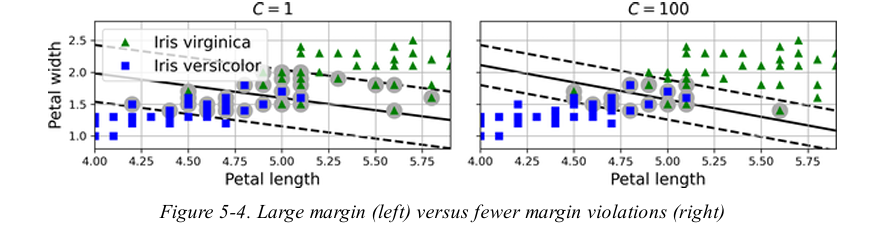

In [4]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [5]:
X_new= [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

# Nonlinear SVM Classification

Hərçənd ki, linear SVM classifiers səmərəlidir və tez-tez gözlənilmədən yaxşı işləyir, bir çox datasets hətta yaxınlıqda belə linearly separable deyil.

Nonlinear datasets ilə işləməyin bir yanaşması əlavə xüsusiyyətlər (features) əlavə etməkdir, məsələn, polynomial features (bunu Chapter 4-də etdiyimiz kimi); bəzi hallarda bu, linearly separable bir dataset ilə nəticələnə bilər.

Figure 5-5-dəki sol qrafiki nəzərə alın: bu, sadə bir dataset-i yalnız bir feature, x ilə təmsil edir. Bu dataset linearly separable deyil, bunu görmək olar. Amma əgər ikinci bir feature x² = (x)² əlavə etsəniz, yaranan 2D dataset mükəmməl linearly separable olur.

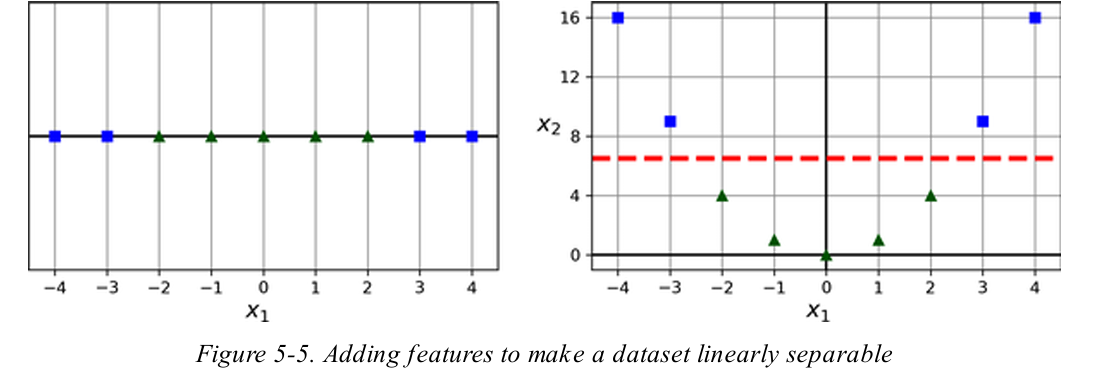

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

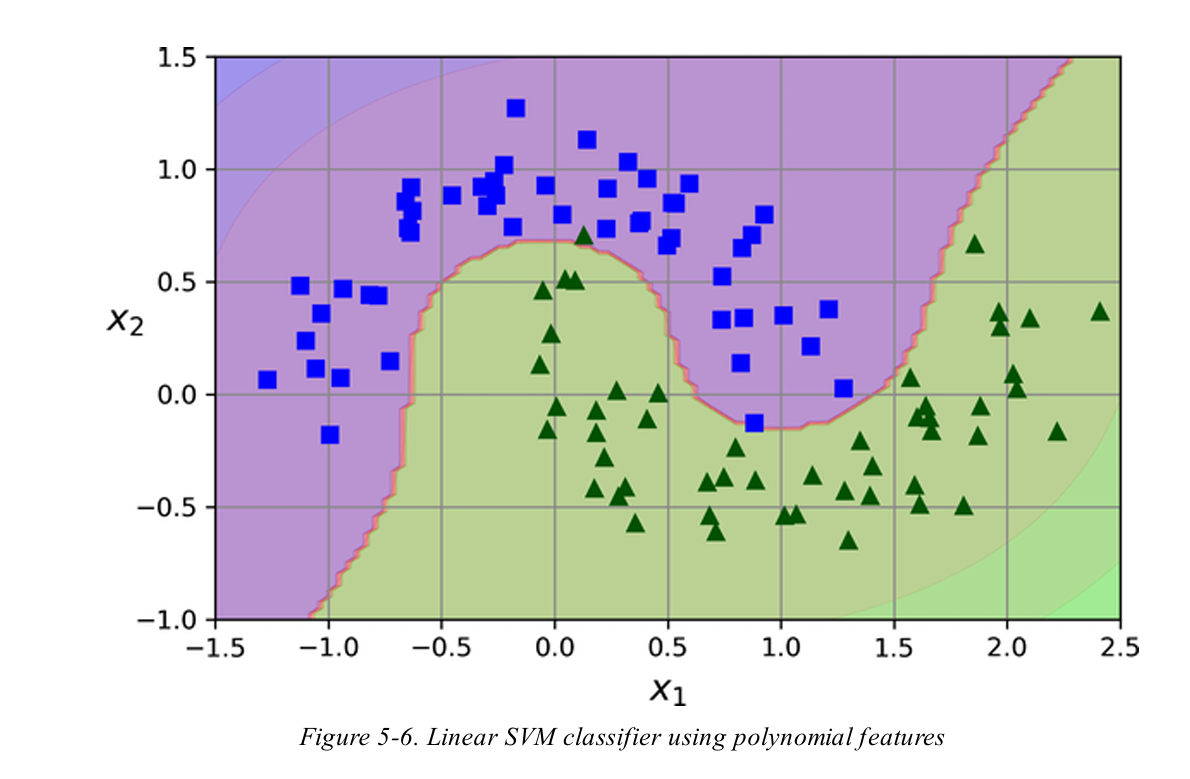

# Polynomial Kernel

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel='poly', degree = 3, coef0=1, C=5))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

# Gaussian RBF Kernel

In [9]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='rbf', gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

#SVM Regression

In [11]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression

# Generate sample data for regression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [12]:
from sklearn.svm import SVR

X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel='poly', degree=2, C = 0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])